# Regression

# Data Preparation Phase

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
from scipy import stats
from scipy.stats import pearsonr
import difflib  # For fuzzy matching

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from fuzzywuzzy import fuzz, process

from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### Data Preprocessing


In [2]:
cars = pd.read_csv("/Desktop/CarPrice.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Summarize numeric columns
cars.describe(include='number')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Summarize string columns
cars.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [6]:
# Check for missing values
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# checking for duplicates
duplicates = cars[cars.duplicated()]
print(f"Number of duplicates: {len(duplicates)}")
duplicates

Number of duplicates: 0


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


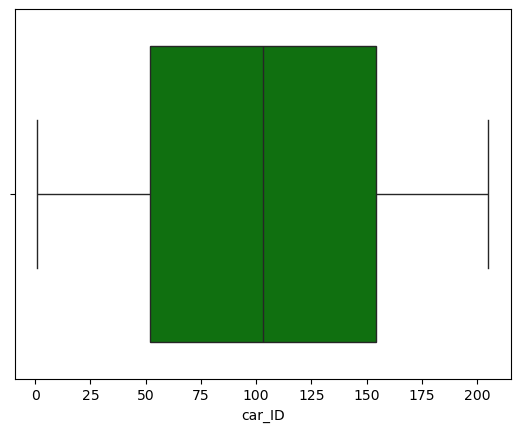

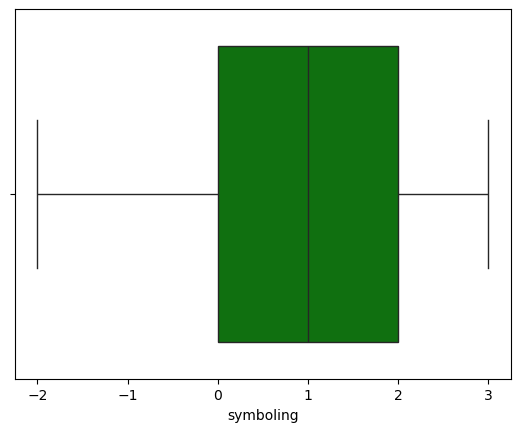

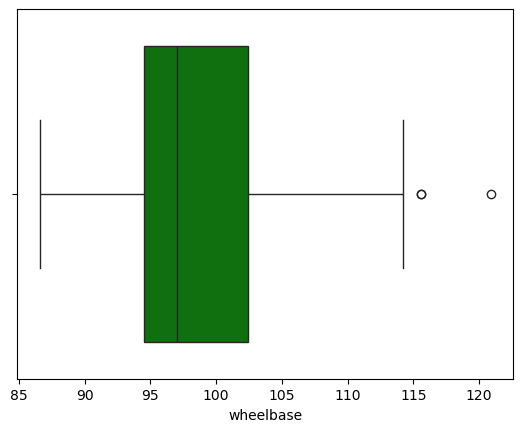

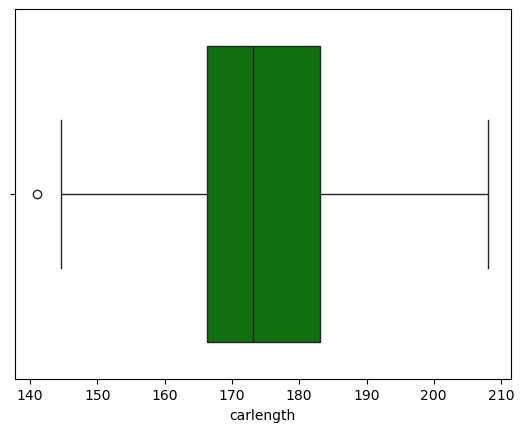

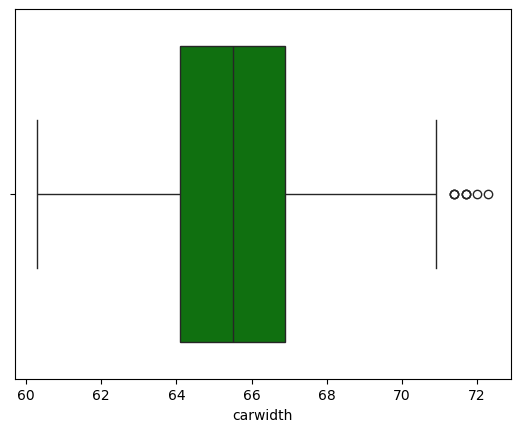

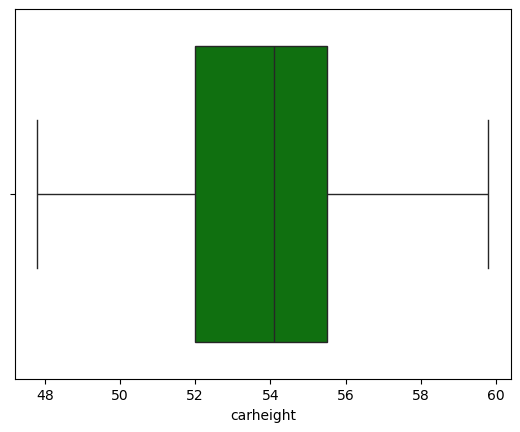

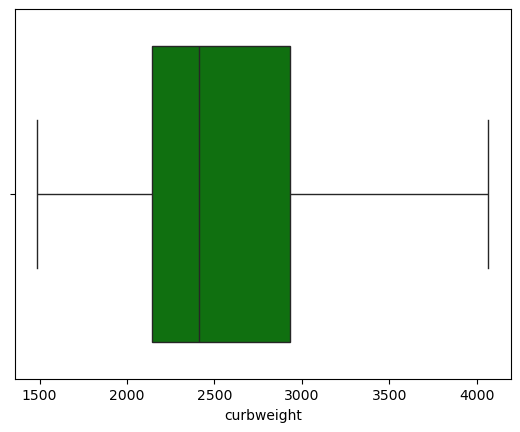

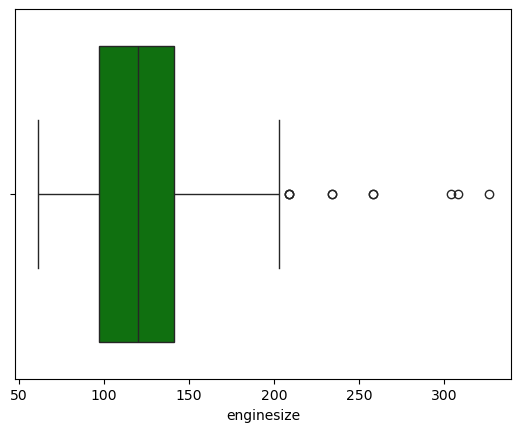

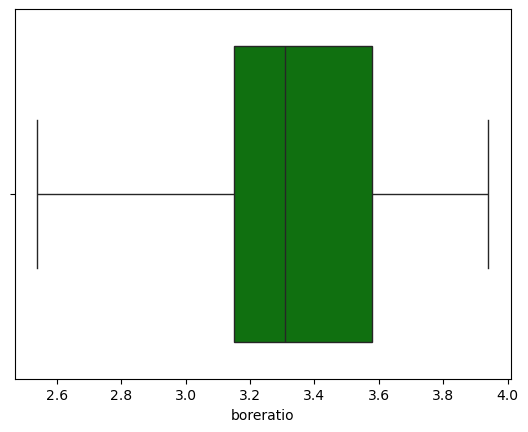

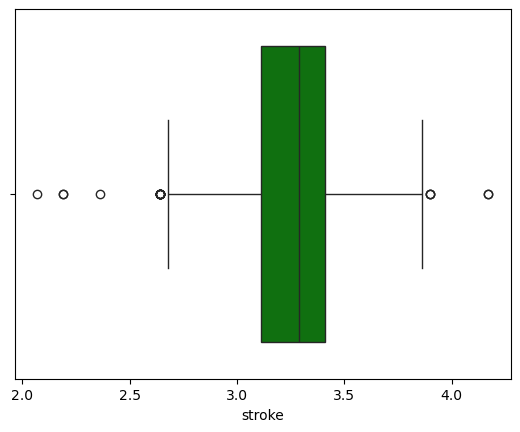

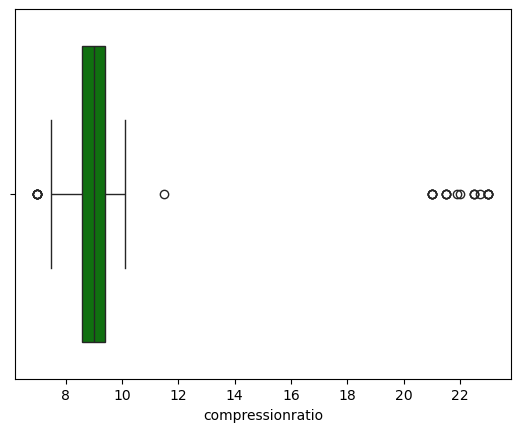

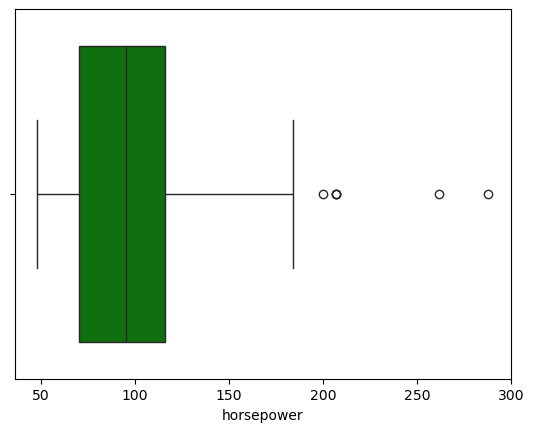

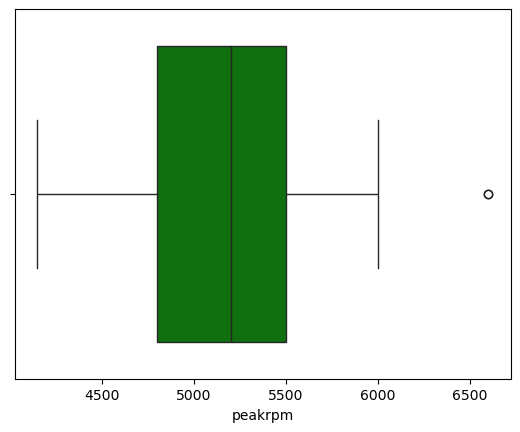

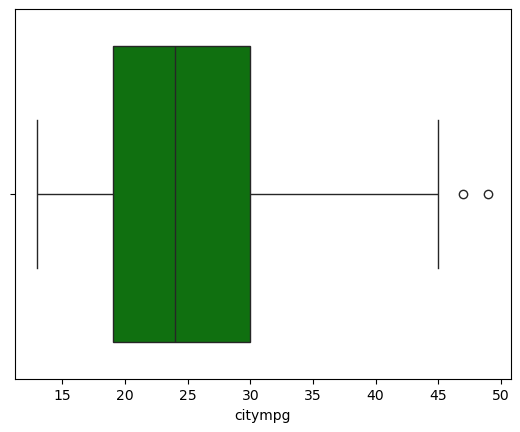

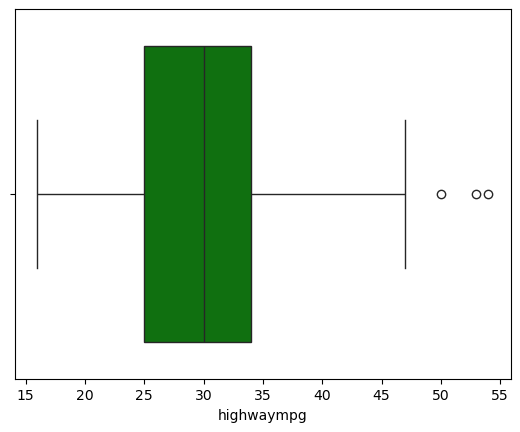

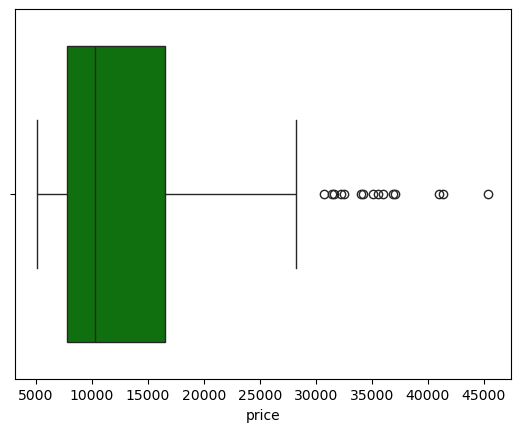

In [8]:
# check for Outliers in the numerical columns 

n_col = cars.select_dtypes(exclude='object').columns
for i in n_col:
    sns.boxplot(cars[i], orient='h', color='green')
    plt.show()

In [9]:
# Outliers detection and Removal

# Defining function to detect and remove outliers
def detect_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    outliers = df[np.abs(z_scores) > threshold][column]
    return outliers

def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    new_cars = df[np.abs(z_scores) < threshold]
    return new_cars

# Detection 
columns = cars.select_dtypes(include=['int', 'float']).columns
for i in columns:
    out = detect_outliers(cars, i)
    print(out)

# Removing Outliers
columns = cars.select_dtypes(include=['int', 'float']).columns
for i in columns:
    cars = remove_outliers(cars, i)

Series([], Name: car_ID, dtype: int64)
Series([], Name: symboling, dtype: int64)
73    120.9
Name: wheelbase, dtype: float64
Series([], Name: carlength, dtype: float64)
Series([], Name: carwidth, dtype: float64)
Series([], Name: carheight, dtype: float64)
Series([], Name: curbweight, dtype: int64)
47    258
48    258
49    326
73    308
74    304
Name: enginesize, dtype: int64
Series([], Name: boreratio, dtype: float64)
111    2.19
113    2.19
134    2.07
Name: stroke, dtype: float64
63     22.7
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compressionratio, dtype: float64
49     262
129    288
Name: horsepower, dtype: int64
165    6600
166    6600
Name: peakrpm, dtype: int64
18    47
30    49
90    45
Name: citympg, dtype: int64
18    53
30    54
Name: highwaympg, dtype: int64
16    41315.0
73    40960.0
74    45400.0
Name: price, dtype: float64


# Exploratory Data Analysis (EDA)

In [10]:
# Summary Statistics
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,101.594286,0.822857,98.388000,173.114857,65.690857,53.705143,2498.531429,120.531429,3.325029,3.267486,9.561829,99.994286,5135.428571,25.188571,30.788571,11802.898097
std,59.436346,1.239922,5.261858,11.296643,1.869423,2.473661,455.271370,28.370251,0.257610,0.279659,2.968905,30.499764,452.231649,5.417499,5.651354,5409.017175
min,1.000000,-2.000000,86.600000,144.600000,61.800000,48.800000,1819.000000,70.000000,2.680000,2.360000,7.000000,60.000000,4150.000000,16.000000,20.000000,5118.000000
25%,51.500000,0.000000,94.500000,166.300000,64.000000,52.000000,2125.000000,97.000000,3.150000,3.150000,8.600000,70.000000,4800.000000,21.000000,25.000000,7649.000000
50%,101.000000,1.000000,96.500000,173.000000,65.400000,54.100000,2403.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,24.000000,30.000000,9988.000000
75%,151.500000,2.000000,101.200000,178.450000,66.500000,55.500000,2845.500000,140.500000,3.580000,3.435000,9.400000,116.000000,5500.000000,30.000000,34.000000,15667.500000
max,205.000000,3.000000,115.600000,202.600000,71.700000,59.800000,3770.000000,209.000000,3.940000,3.900000,22.000000,200.000000,6000.000000,38.000000,47.000000,31600.000000


In [11]:
# Dropping ID column as it isn't necessary in the prediction
cars.drop(columns=['car_ID'], inplace=True)
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# Summarize string columns
cars.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,175,175,175,175,175,175,175,175,175,175
unique,126,2,2,2,5,3,1,6,4,8
top,toyota corolla,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,5,165,142,100,78,108,175,134,144,76


In [13]:
# Explore unique categories in each categorical variable

categorical_cols = cars.select_dtypes(exclude=["number"]).columns
for col in categorical_cols:
    print(f" **{col}**: {cars[col].nunique()} unique categories") 
# - {col} inserts the current categorical column name dynamically. 
# - cars[col].nunique() returns the number of unique categories in that column.
# - The formatted string (f"...") ensures the column name and unique count are displayed properly.
    print(cars[col].value_counts(), "\n" + "-"*50)

# cars[col].value_counts() → Returns the frequency count of each unique category.
# "\n" + "-"*50 → Adds a line separator (----------) for better readability.


 **CarName**: 126 unique categories
CarName
toyota corolla          5
toyota corona           5
peugeot 504             4
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
isuzu D-Max V-Cross     1
volvo diesel            1
Name: count, Length: 126, dtype: int64 
--------------------------------------------------
 **fueltype**: 2 unique categories
fueltype
gas       165
diesel     10
Name: count, dtype: int64 
--------------------------------------------------
 **aspiration**: 2 unique categories
aspiration
std      142
turbo     33
Name: count, dtype: int64 
--------------------------------------------------
 **doornumber**: 2 unique categories
doornumber
four    100
two      75
Name: count, dtype: int64 
--------------------------------------------------
 **carbody**: 5 unique categories
carbody
sedan          78
hatchback      64
wagon          24
hardtop         5
convertible  

In [14]:
# Merge similar categories in fuel system
cars["fuelsystem"] = cars["fuelsystem"].replace({
    "1bbl": "carburetor",
    "2bbl": "carburetor",
    "4bbl": "carburetor",
    "mfi": "mpfi",
    "spfi": "mpfi"
})

# Merge drivewheel into AWD vs. non-AWD
cars["drivewheel"] = cars["drivewheel"].replace({
    "4wd": "AWD",
    "fwd": "non-AWD",
    "rwd": "non-AWD"
})

# Create a binary feature for turbo aspiration
cars["turbo_flag"] = cars["aspiration"].apply(lambda x: 1 if x == "turbo" else 0)

# Display unique categories after merging
print("Updated Fuel System Categories:\n", cars["fuelsystem"].value_counts())
print("\nUpdated Drivewheel Categories:\n", cars["drivewheel"].value_counts())
print("\nTurbo Flag (Binary):\n", cars["turbo_flag"].value_counts())

Updated Fuel System Categories:
 fuelsystem
mpfi          78
carburetor    78
idi           10
spdi           9
Name: count, dtype: int64

Updated Drivewheel Categories:
 drivewheel
non-AWD    166
AWD          9
Name: count, dtype: int64

Turbo Flag (Binary):
 turbo_flag
0    142
1     33
Name: count, dtype: int64


In [15]:
# Extract the brand name (first word before space in carNAme)
cars["Brand"] = cars["CarName"].apply(lambda x: x.split(" ")[0])

# Count the frequency of each brand
brand_counts = cars["Brand"].value_counts()

# Display the number of unique brands
print(f"Total number of unique brands: {brand_counts.shape[0]}")

# Display the frequency of each brand
print(brand_counts)

Total number of unique brands: 25
Brand
toyota         26
nissan         16
mazda          14
mitsubishi     13
honda          12
subaru         12
volvo          10
dodge           9
peugeot         9
audi            7
plymouth        7
bmw             6
volkswagen      6
saab            5
isuzu           4
buick           4
alfa-romero     3
renault         2
maxda           2
chevrolet       2
vw              2
porsche         1
mercury         1
toyouta         1
Nissan          1
Name: count, dtype: int64


In [16]:
# Get the list of unique brands
unique_brands = cars["Brand"].unique()

# Find similar brand names
similar_brands = {}
threshold = 80  # Similarity threshold (adjustable)

for brand in unique_brands:
    matches = process.extract(brand, unique_brands, scorer=fuzz.token_sort_ratio)
    similar = [match[0] for match in matches if match[1] >= threshold and match[0] != brand]
    
    if similar:
        similar_brands[brand] = similar

# Display similar brand names with spelling variations
for brand, matches in similar_brands.items():
    print(f"Brand: {brand} -> Possible Duplicates: {matches}")

Brand: maxda -> Possible Duplicates: ['mazda']
Brand: mazda -> Possible Duplicates: ['maxda']
Brand: Nissan -> Possible Duplicates: ['nissan']
Brand: nissan -> Possible Duplicates: ['Nissan']
Brand: toyota -> Possible Duplicates: ['toyouta']
Brand: toyouta -> Possible Duplicates: ['toyota']


In [17]:
# Manually define corrections for known brand misspellings
manual_corrections = {
    "maxda": "mazda",
    "toyouta": "toyota",
    "porcshe": "porsche",
    "vokswagen": "volkswagen",
    "vw": "volkswagen",
    "vokswagen": "volkswagen",
    "Nissan": "nissan"
}

# Apply manual corrections first
cars["Brand"] = cars["Brand"].replace(manual_corrections)

# Get unique brands after manual corrections
unique_brands = cars["Brand"].unique().tolist()

# Use fuzzy matching for minor spelling differences
threshold = 85  # Similarity threshold
brand_corrections = {}

for brand in unique_brands:
    match = process.extractOne(brand, unique_brands, scorer=fuzz.token_sort_ratio)
    
    if match and match[1] >= threshold and match[0] != brand:
        corrected_brand = match[0]
        brand_corrections[brand] = corrected_brand

# Replace inconsistent brand names with corrected versions
cars["Brand"] = cars["Brand"].replace(brand_corrections)

# Display fixed brand name inconsistencies
print("Fixed brand name inconsistencies:")
print(brand_corrections)

Fixed brand name inconsistencies:
{}


In [18]:
# Get the list of unique brands to check if the brands names has been modified 
unique_brands = cars["Brand"].unique()
print(unique_brands)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [19]:
# Count the frequency of each brand after modifying the spelling in the brand name
brand_counts = cars["Brand"].value_counts()

# Display the number of unique brands
print(f"Total number of unique brands: {brand_counts.shape[0]}")

# Display the frequency of each brand
print(brand_counts)

Total number of unique brands: 21
Brand
toyota         27
nissan         17
mazda          16
mitsubishi     13
subaru         12
honda          12
volvo          10
dodge           9
peugeot         9
volkswagen      8
audi            7
plymouth        7
bmw             6
saab            5
isuzu           4
buick           4
alfa-romero     3
renault         2
chevrolet       2
mercury         1
porsche         1
Name: count, dtype: int64


In [20]:
# Extract Model Name from CarName
cars["Model"] = cars["CarName"].apply(lambda x: " ".join(x.split(" ")[1:]))  # Extract remaining words as Model

# Display the first few rows
print(cars[["CarName", "Brand", "Model"]].head())
cars["Model"].unique()

                    CarName        Brand         Model
0        alfa-romero giulia  alfa-romero        giulia
1       alfa-romero stelvio  alfa-romero       stelvio
2  alfa-romero Quadrifoglio  alfa-romero  Quadrifoglio
3               audi 100 ls         audi        100 ls
4                audi 100ls         audi         100ls


array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'monte carlo', 'vega 2300', 'rampage', 'challenger se', 'd200',
       'monaco (sw)', 'colt hardtop', 'colt (sw)', 'coronet custom',
       'dart custom', 'coronet custom (sw)', 'civic cvcc', 'civic',
       'accord cvcc', 'accord lx', 'civic 1500 gl', 'accord',
       'civic 1300', 'prelude', 'civic (auto)', 'MU-X', 'D-Max ',
       'D-Max V-Cross', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626',
       'glc', 'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'cougar', 'mirage', 'lancer', 'outlander', 'g4', 'mirage g4',
       'montero', 'pajero', 'versa', 'rogue', 'latio', 'titan', 'leaf',
       'juke', 'note', 'clipper', 'nv200', 'dayz', 'fuga', 'otti',
       'teana', 'kicks', '504', '304', '504 (sw)', '604sl',
       '505s turbo diesel', 'fury iii', 'cr

In [21]:
# Fix spacing issues (e.g., "100ls" → "100 ls")
cars["Model"] = cars["Model"].str.replace(r'(\d+)([a-zA-Z]+)', r'\1 \2', regex=True)  # Add space between digits & letters
cars["Model"] = cars["Model"].str.replace(r'([a-zA-Z]+)(\d+)', r'\1 \2', regex=True)  # Add space between letters & digits

# Dictionary for manually fixing known model inconsistencies
manual_corrections = {
    "civic cvcc": "civic",
    "civic 1300": "civic",
    "civic auto": "civic",
    "corolla 1200": "corolla",
    "corolla hardtop": "corolla",
    "corolla liftback": "corolla",
    "corona mark ii": "mark ii",
    "electra 225 custom": "electra 225",
    "century luxus sw": "century",
    "rx 3": "rx-series",
    "rx 4": "rx-series",
    "rx 7 gs": "rx-series",
    "144 ea": "volvo 144",
    "145 e sw": "volvo 145",
    "244 dl": "volvo 244",
    "245": "volvo 245",
    "glc deluxe": "glc",
    "glc 4": "glc",
    "glc custom": "glc",
    "99 le": "99-series",
    "99 gle": "99-series",
    "99 e": "99-series"
}

# Apply manual corrections
cars["Model"] = cars["Model"].replace(manual_corrections)

# Function to find & merge similar model names using fuzzy matching
def find_similar_models(model_list):
    similar_models = {}
    for model in model_list:
        matches = difflib.get_close_matches(model, model_list, n=1, cutoff=0.9)  # Higher cutoff = stricter match
        if matches and model != matches[0]:
            similar_models[model] = matches[0]
    return similar_models

# Apply fuzzy matching for deduplication
model_corrections = find_similar_models(cars["Model"].unique())
cars["Model"] = cars["Model"].replace(model_corrections)

# Display cleaned model names
print(cars[["CarName", "Brand", "Model"]].head(20))  # Show first 20 rows



                     CarName        Brand            Model
0         alfa-romero giulia  alfa-romero           giulia
1        alfa-romero stelvio  alfa-romero          stelvio
2   alfa-romero Quadrifoglio  alfa-romero     Quadrifoglio
3                audi 100 ls         audi           100 ls
4                 audi 100ls         audi           100 ls
5                   audi fox         audi              fox
6                 audi 100ls         audi           100 ls
7                  audi 5000         audi             5000
8                  audi 4000         audi             4000
9        audi 5000s (diesel)         audi  5000 s (diesel)
10                  bmw 320i          bmw            320 i
11                  bmw 320i          bmw            320 i
12                    bmw x1          bmw              x 1
13                    bmw x3          bmw              x 3
14                    bmw z4          bmw              z 4
15                    bmw x4          bmw              x

In [22]:
# Get the list of unique models
unique_models = cars["Model"].unique()
# Get the total number for brands
num_models = cars["Model"].count()
print(num_models)
print(unique_models)

175
['giulia' 'stelvio' 'Quadrifoglio' '100 ls' 'fox' '5000' '4000'
 '5000 s (diesel)' '320 i' 'x 1' 'x 3' 'z 4' 'x 4' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd 200' 'monaco (sw)'
 'colt hardtop' 'colt (sw)' 'coronet custom' 'dart custom'
 'coronet custom (sw)' 'civic' 'accord cvcc' 'accord lx' 'civic 1500 gl'
 'accord' 'prelude' 'civic (auto)' 'MU-X' 'D-Max ' 'D-Max V-Cross'
 'rx-series' 'glc' 'rx 2 coupe' 'rx-4' '626' 'rx-7 gs' 'glc custom l'
 'electra 225' 'century luxus (sw)' 'century' 'skyhawk' 'cougar' 'mirage'
 'lancer' 'outlander' 'g 4' 'mirage g 4' 'montero' 'pajero' 'versa'
 'rogue' 'latio' 'titan' 'leaf' 'juke' 'note' 'clipper' 'nv 200' 'dayz'
 'fuga' 'otti' 'teana' 'kicks' '504' '304' '504 (sw)' '604 sl'
 '505 s turbo diesel' 'fury iii' 'cricket' 'satellite custom (sw)'
 'fury gran sedan' 'valiant' 'duster' 'macan' '12 tl' '5 gtl' '99-series'
 '' 'dl' 'brz' 'baja' 'r 1' 'r 2' 'trezia' 'tribeca' 'mark ii' 'corona'
 'corolla' 'corona hardtop' 'corolla 1600 (sw)'

Text(0.5, 1.0, 'Correlation Heatmap')

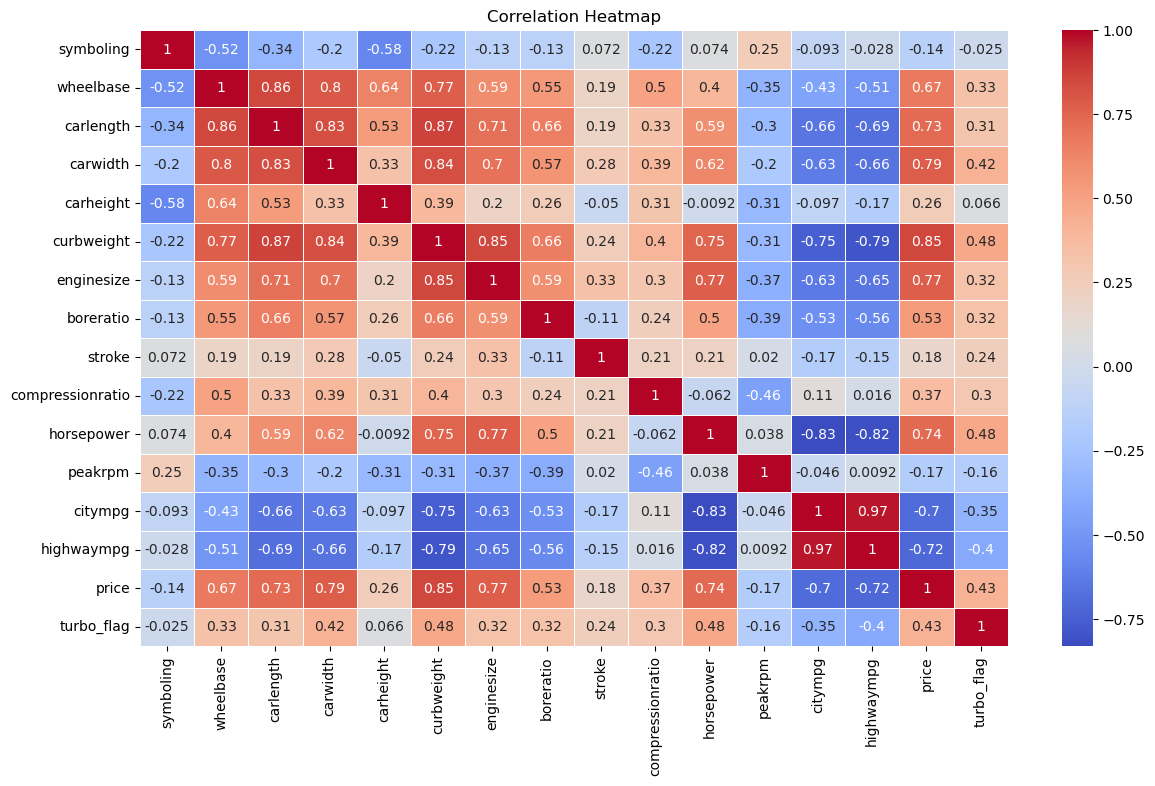

In [23]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(14, 8))  # Enlarging just the heatmap
sns.heatmap(cars.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Car Price Distribution')

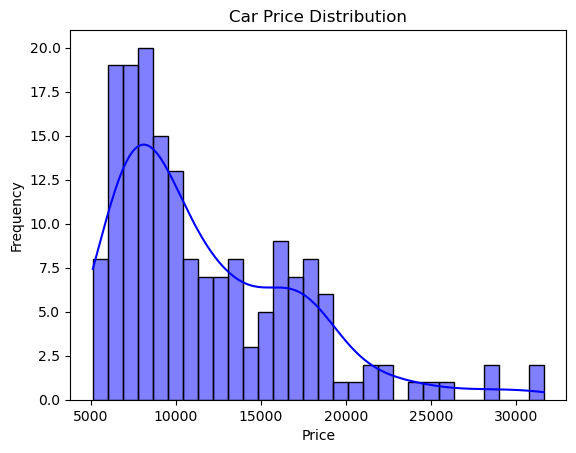

In [24]:
# Car Price Distribution
sns.histplot(cars["price"], bins=30, kde=True, color="blue")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Car Price Distribution")


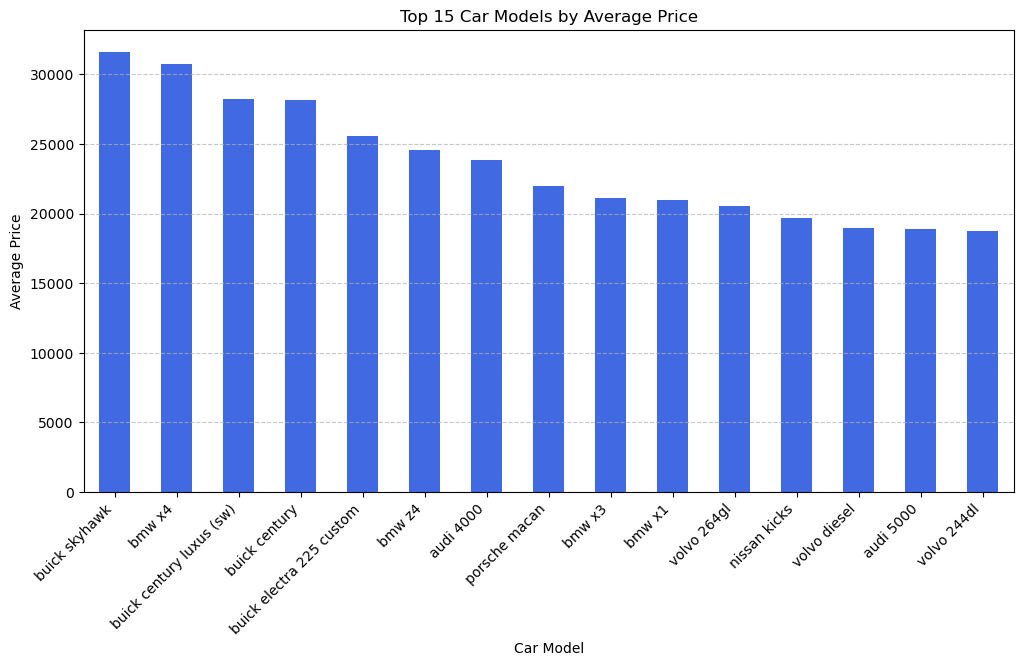

In [26]:
# Group by Car Model & Compute Average Price
top_cn = cars.groupby("CarName")["price"].mean().sort_values(ascending=False).head(15)  # Change to 10 for top 10

# Plot the Top Car Models
plt.figure(figsize=(12, 6))
top_cn.plot(kind="bar", color="royalblue")
plt.xlabel("Car Model")
plt.ylabel("Average Price")
plt.title("Top 15 Car Models by Average Price")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [51]:
top_10_carnames = cars.groupby("CarName")["price"].mean().sort_values(ascending=False).head(10).index.tolist()

# Print the Top 10 Car Names
print("Top 10 Car Names by Average Price:", top_10_carnames)


Top 10 Car Names by Average Price: ['buick skyhawk', 'bmw x4', 'buick century luxus (sw)', 'buick century', 'buick electra 225 custom', 'bmw z4', 'audi 4000', 'porsche macan', 'bmw x3', 'bmw x1']


/var/folders/9q/ftyr2fgd2bvbt44t3vyw232c0000gn/T/ipykernel_6913/1916808209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")


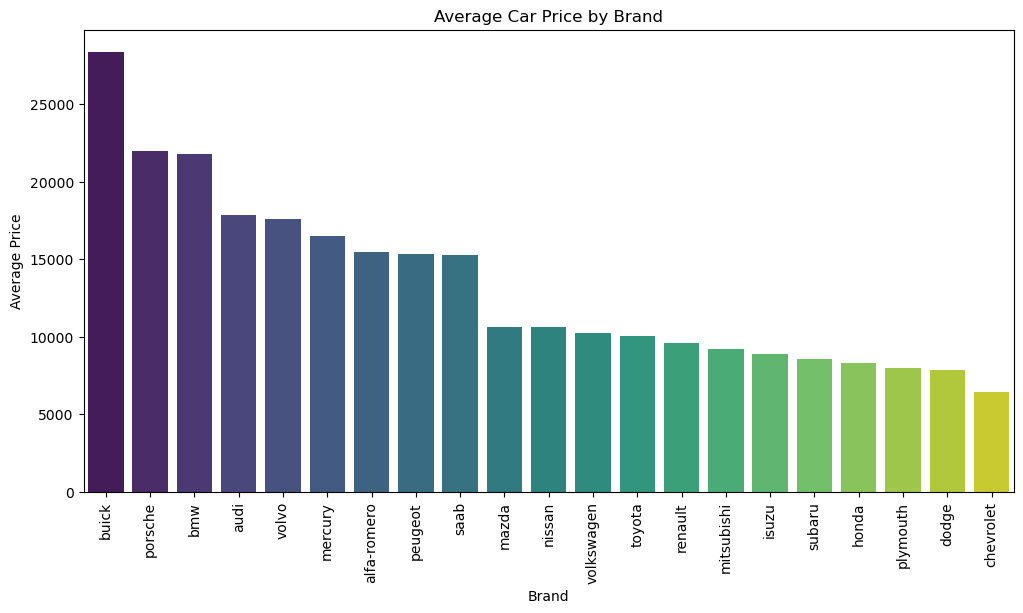

In [28]:

# Compute average car price per brand
brand_avg_price = cars.groupby("Brand")["price"].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,6))
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Car Price by Brand")
plt.show()


/var/folders/9q/ftyr2fgd2bvbt44t3vyw232c0000gn/T/ipykernel_6913/680624544.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symboling_avg_price.index, y=symboling_avg_price.values, palette="magma")


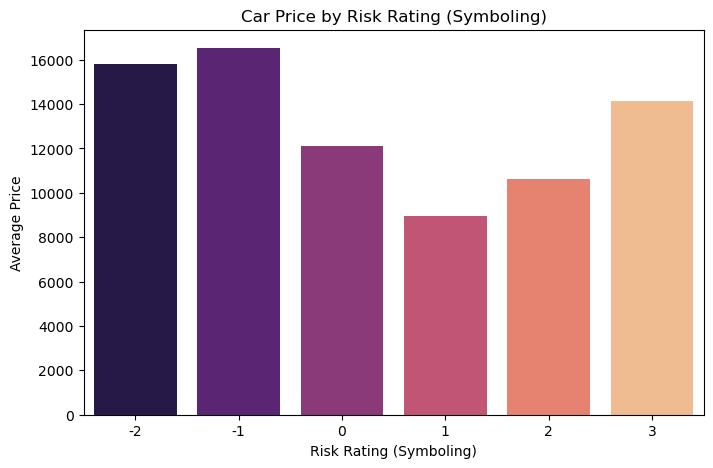

In [29]:
# Average price by symboling (risk rating)
symboling_avg_price = cars.groupby("symboling")["price"].mean()

# Plot results
plt.figure(figsize=(8,5))
sns.barplot(x=symboling_avg_price.index, y=symboling_avg_price.values, palette="magma")
plt.xlabel("Risk Rating (Symboling)")
plt.ylabel("Average Price")
plt.title("Car Price by Risk Rating (Symboling)")
plt.show()


Correlation between Engine Size and Price: 0.77


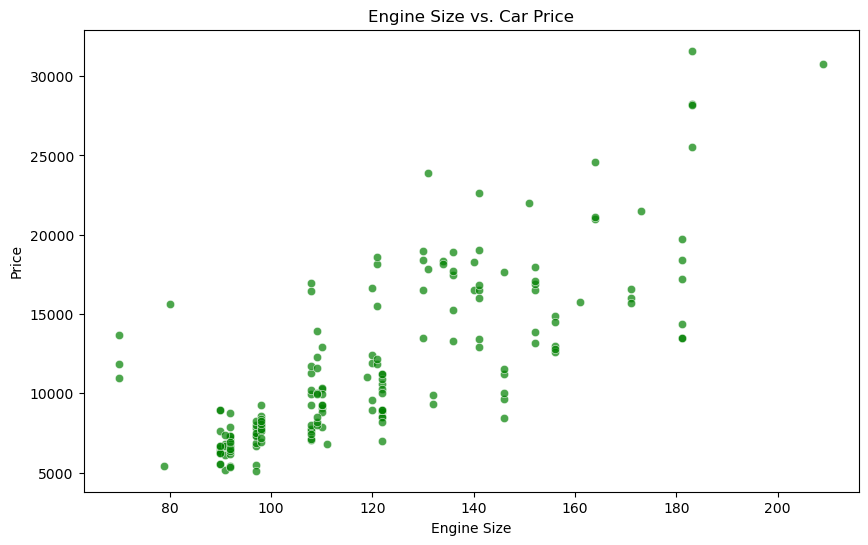

In [30]:
# Compute correlation
corr_engine_size, _ = pearsonr(cars["enginesize"], cars["price"])
print(f"Correlation between Engine Size and Price: {corr_engine_size:.2f}")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=cars["enginesize"], y=cars["price"], alpha=0.7, color="green")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs. Car Price")
plt.show()


Correlation between Bore Ratio and Price: 0.53
Correlation between Compression Ratio and Price: 0.37


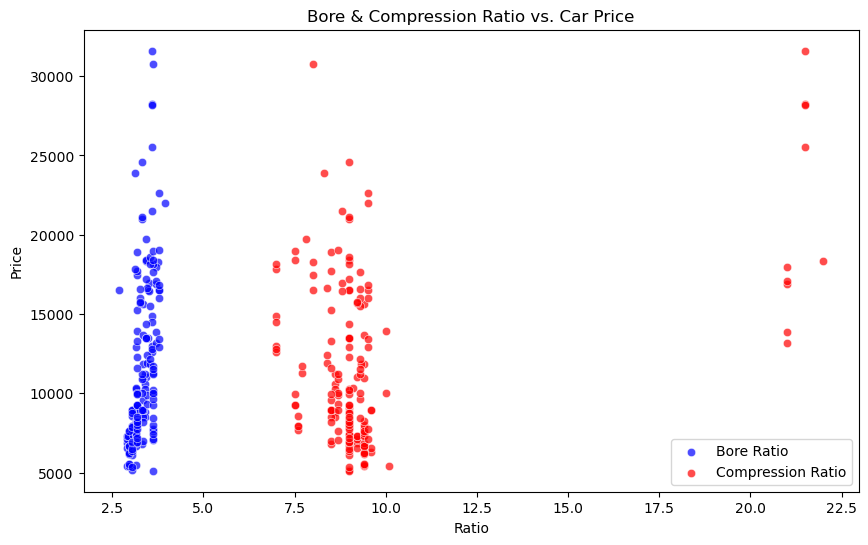

In [31]:
# Compute correlation
corr_bore, _ = pearsonr(cars["boreratio"], cars["price"])
corr_compression, _ = pearsonr(cars["compressionratio"], cars["price"])

print(f"Correlation between Bore Ratio and Price: {corr_bore:.2f}")
print(f"Correlation between Compression Ratio and Price: {corr_compression:.2f}")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=cars["boreratio"], y=cars["price"], alpha=0.7, color="blue", label="Bore Ratio")
sns.scatterplot(x=cars["compressionratio"], y=cars["price"], alpha=0.7, color="red", label="Compression Ratio")
plt.xlabel("Ratio")
plt.ylabel("Price")
plt.title("Bore & Compression Ratio vs. Car Price")
plt.legend()
plt.show()


Correlation between Wheelbase and Price: 0.67


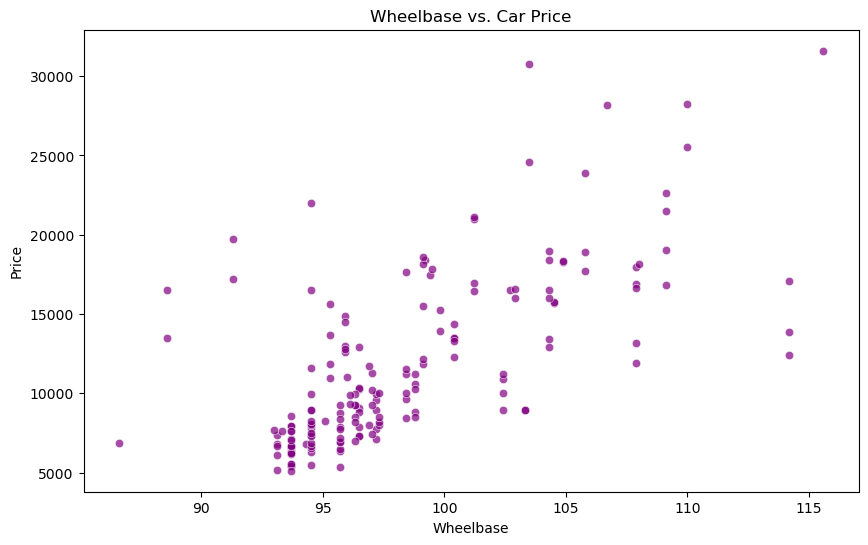

In [32]:
# Compute correlation
corr_wheelbase, _ = pearsonr(cars["wheelbase"], cars["price"])
print(f"Correlation between Wheelbase and Price: {corr_wheelbase:.2f}")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=cars["wheelbase"], y=cars["price"], alpha=0.7, color="purple")
plt.xlabel("Wheelbase")
plt.ylabel("Price")
plt.title("Wheelbase vs. Car Price")
plt.show()


/var/folders/9q/ftyr2fgd2bvbt44t3vyw232c0000gn/T/ipykernel_6913/3286041939.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_avg_price.index, y=fuel_avg_price.values, palette="coolwarm")


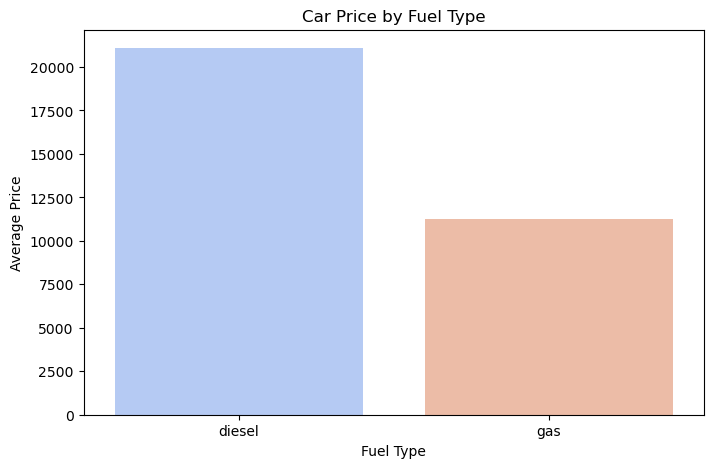

/var/folders/9q/ftyr2fgd2bvbt44t3vyw232c0000gn/T/ipykernel_6913/3286041939.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_system_avg_price.index, y=fuel_system_avg_price.values, palette="coolwarm")


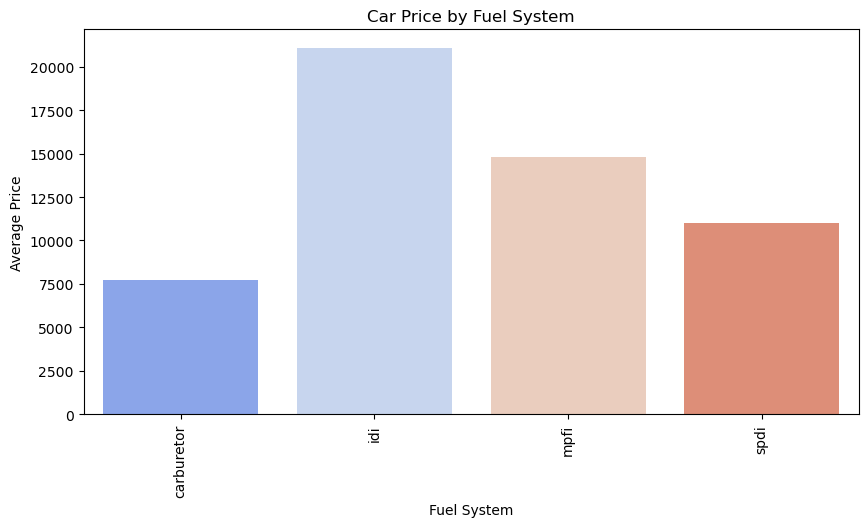

In [33]:
# Average price by fuel type
fuel_avg_price = cars.groupby("fueltype")["price"].mean()
fuel_system_avg_price = cars.groupby("fuelsystem")["price"].mean()

# Plot fuel type impact
plt.figure(figsize=(8,5))
sns.barplot(x=fuel_avg_price.index, y=fuel_avg_price.values, palette="coolwarm")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.title("Car Price by Fuel Type")
plt.show()

# Plot fuel system impact
plt.figure(figsize=(10,5))
sns.barplot(x=fuel_system_avg_price.index, y=fuel_system_avg_price.values, palette="coolwarm")
plt.xlabel("Fuel System")
plt.ylabel("Average Price")
plt.title("Car Price by Fuel System")
plt.xticks(rotation=90)
plt.show()


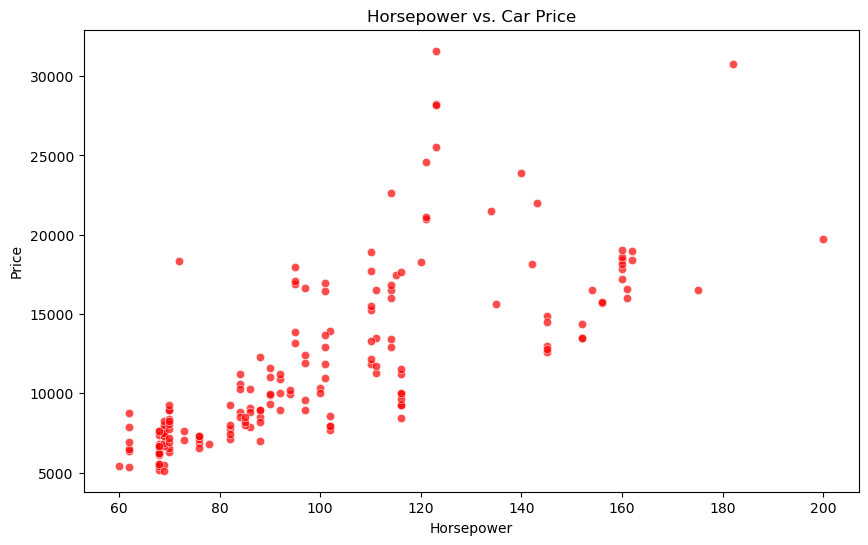

In [34]:
# Scatter plot of Horsepower vs. Price
plt.figure(figsize=(10,6))
sns.scatterplot(x=cars["horsepower"], y=cars["price"], alpha=0.7, color="red")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs. Car Price")
plt.show()


## Checking why Buick had a higher avg price and if it is an outlier

In [35]:
# Filter for Buick, Porsche, and BMW
brands_to_compare = ["buick", "porsche", "bmw"]
df_filtered = cars[cars["Brand"].isin(brands_to_compare)]

# Compute median prices
median_prices = df_filtered.groupby("Brand")["price"].median().sort_values(ascending=False)

# Display median prices
print("Median Car Prices for Buick, Porsche, and BMW:")
print(median_prices)

Median Car Prices for Buick, Porsche, and BMW:
Brand
buick      28212.0
porsche    22018.0
bmw        21037.5
Name: price, dtype: float64


In [36]:
print(cars[cars["Brand"] == "buick"]["price"].describe())


count        4.00000
mean     28394.00000
std       2478.18751
min      25552.00000
25%      27520.00000
50%      28212.00000
75%      29086.00000
max      31600.00000
Name: price, dtype: float64


In [37]:
print(cars[cars["Brand"] == "buick"][["Model", "price"]])


                 Model    price
67         electra 225  25552.0
68  century luxus (sw)  28248.0
69             century  28176.0
70             skyhawk  31600.0


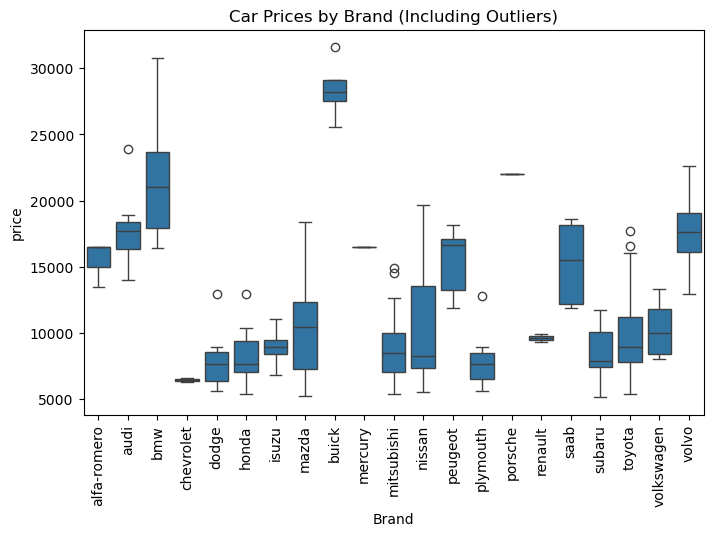

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=cars["Brand"], y=cars["price"], data=cars, showfliers=True)
plt.xticks(rotation=90)
plt.title("Car Prices by Brand (Including Outliers)")
plt.show()


In [40]:
cars[cars["Brand"] == "buick"].sort_values(by="price", ascending=False)


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,turbo_flag,Brand,Model
70,-1,buick skyhawk,diesel,turbo,four,sedan,non-AWD,front,115.6,202.6,...,3.64,21.5,123,4350,22,25,31600.0,1,buick,skyhawk
68,-1,buick century luxus (sw),diesel,turbo,four,wagon,non-AWD,front,110.0,190.9,...,3.64,21.5,123,4350,22,25,28248.0,1,buick,century luxus (sw)
69,0,buick century,diesel,turbo,two,hardtop,non-AWD,front,106.7,187.5,...,3.64,21.5,123,4350,22,25,28176.0,1,buick,century
67,-1,buick electra 225 custom,diesel,turbo,four,sedan,non-AWD,front,110.0,190.9,...,3.64,21.5,123,4350,22,25,25552.0,1,buick,electra 225


/var/folders/9q/ftyr2fgd2bvbt44t3vyw232c0000gn/T/ipykernel_6913/1193328798.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered["Brand"], y=df_filtered["price"], palette="coolwarm")


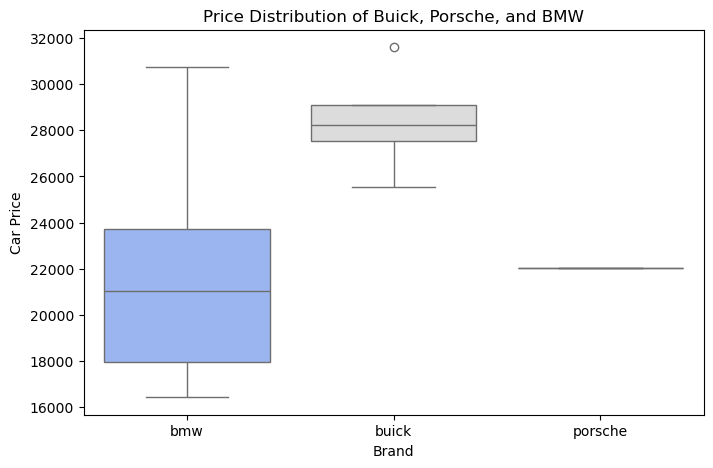

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data
df_filtered = cars[cars["Brand"].isin(["buick", "porsche", "bmw"])]

# Boxplot to visualize price distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df_filtered["Brand"], y=df_filtered["price"], palette="coolwarm")
plt.xlabel("Brand")
plt.ylabel("Car Price")
plt.title("Price Distribution of Buick, Porsche, and BMW")
plt.show()


# Modeling Phase and Evaluation

In [43]:
# Selecting features (X) and target variable (y)
X = cars.drop(columns=["price", "CarName", "enginelocation", "aspiration","Model"])  # Drop target and non-useful columns
y = cars["price"]

In [44]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [45]:
# Define preprocessing (scaling & encoding)
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),  
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  
])

In [46]:
# Define outer (10-Fold) and inner (5-Fold) cross-validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [47]:
# Models to evaluate

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.4)  #  Feature selection using Lasso
}

# Store Results
results = {"Before": {}, "After": {}}
for name in models.keys():
    results["Before"][name] = {"R2": [], "MAE": [], "RMSE": []}
    results["After"][name] = {"R2": [], "MAE": [], "RMSE": []}



In [48]:
# Outer Cross-Validation Loop (Model Evaluation)
for train_idx, test_idx in outer_cv.split(X):
    X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Transform Data
    preprocessor.fit(X_train_raw)
    X_train = preprocessor.transform(X_train_raw)
    X_test = preprocessor.transform(X_test_raw)
    feature_names = np.array(preprocessor.get_feature_names_out())

    # Train & Evaluate Models BEFORE Feature Selection
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results["Before"][name]["R2"].append(r2_score(y_test, y_pred))
        results["Before"][name]["MAE"].append(mean_absolute_error(y_test, y_pred))
        results["Before"][name]["RMSE"].append(mean_squared_error(y_test, y_pred, squared=False))

    # Inner CV for Feature Selection Using Lasso
    feature_importance = np.zeros(X_train.shape[1])

    for inner_train_idx, inner_test_idx in inner_cv.split(X_train):
        X_inner_train, X_inner_test = X_train[inner_train_idx], X_train[inner_test_idx]
        y_inner_train, y_inner_test = y_train.iloc[inner_train_idx], y_train.iloc[inner_test_idx]

        lasso = Lasso(alpha=0.4).fit(X_inner_train, y_inner_train)  # Feature selection
        feature_importance += (lasso.coef_ != 0)

    # Keep Features Selected in at Least 80% of Inner Folds
    min_folds = int(inner_cv.get_n_splits() * 0.8)  
    selected = feature_importance >= min_folds
    X_train_sel, X_test_sel = X_train[:, selected], X_test[:, selected]

    print(f" Features Before: {X_train.shape[1]}, After: {X_train_sel.shape[1]}")

    # Train & Evaluate Models AFTER Feature Selection
    for name, model in models.items():
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        results["After"][name]["R2"].append(r2_score(y_test, y_pred))
        results["After"][name]["MAE"].append(mean_absolute_error(y_test, y_pred))
        results["After"][name]["RMSE"].append(mean_squared_error(y_test, y_pred, squared=False))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.893e+07, tolerance: 4.219e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated 

 Features Before: 61, After: 52
 Features Before: 61, After: 54


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.496e+06, tolerance: 4.624e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated 

 Features Before: 61, After: 52
 Features Before: 61, After: 52


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.148e+06, tolerance: 3.789e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.220e+07, tolerance: 3.852e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+07, toler

 Features Before: 61, After: 51
 Features Before: 61, After: 54


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+06, tolerance: 4.168e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.312e+06, tolerance: 3.497e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/

 Features Before: 61, After: 47
 Features Before: 60, After: 51


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.353e+06, tolerance: 4.358e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated 

 Features Before: 60, After: 49
 Features Before: 61, After: 53


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.553e+06, tolerance: 4.450e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated 

In [49]:
# Compute & Compare Average Performance
def avg_results(res):
    return {m: {k: np.mean(v) for k, v in res[m].items()} for m in res}

df_before = pd.DataFrame(avg_results(results["Before"])).T.add_prefix("All_")
df_after = pd.DataFrame(avg_results(results["After"])).T.add_prefix("Selected_")

# Compare Performance Before vs. After Feature Selection
comparison = pd.concat([df_before, df_after], axis=1)
print("\n Model Performance Before vs. After Feature Selection:\n", comparison.round(4))



 Model Performance Before vs. After Feature Selection:
         All_R2    All_MAE   All_RMSE  Selected_R2  Selected_MAE  Selected_RMSE
Linear  0.7741  1526.5827  2056.2154       0.7861     1514.3541      2024.8481
Ridge   0.8308  1402.6598  1827.3017       0.8237     1392.0492      1844.0128
Lasso   0.7869  1491.3932  1997.4866       0.7921     1487.8858      1985.4706


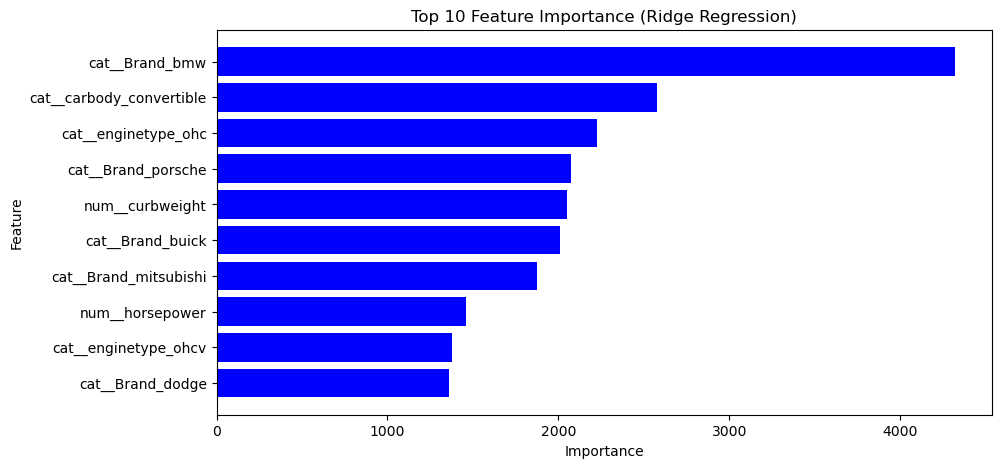

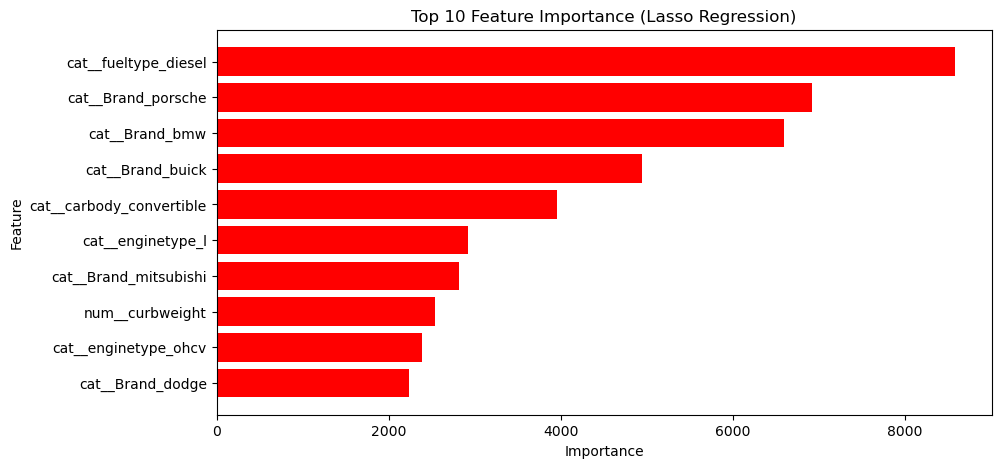

In [50]:

#  Get Feature Names After Selection
selected_features = feature_names[selected]  # Get only selected features

#  Get Importance for Ridge & Lasso
ridge_importance = np.abs(models["Ridge"].coef_)  # Ridge Regression Coefficients
lasso_importance = np.abs(models["Lasso"].coef_)  # Lasso Regression Coefficients

# Sort Features by Importance
ridge_sorted_idx = np.argsort(ridge_importance)[::-1]  # Sort in descending order
lasso_sorted_idx = np.argsort(lasso_importance)[::-1]

#  Plot Function
def plot_feature_importance(model_name, importance_values, sorted_idx, color):
    plt.figure(figsize=(10, 5))
    plt.barh(np.array(selected_features)[sorted_idx][:10], importance_values[sorted_idx][:10], color=color)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Top 10 Feature Importance ({model_name})")
    plt.gca().invert_yaxis()
    plt.show()

# Plot Top 10 Features for Ridge & Lasso
plot_feature_importance("Ridge Regression", ridge_importance, ridge_sorted_idx, "blue")
plot_feature_importance("Lasso Regression", lasso_importance, lasso_sorted_idx, "red")
